# PARTICLE FILTERS

### Slide 1: **Overview**

In this session, we will cover the following topics in detail:

1. **What is a particle filter?**  
   - We will begin by understanding what a particle filter is, why it is important, and where it is used. Essentially, it is a tool for making sense of noisy or uncertain data, commonly used in robotics and other fields.

2. **Bayesian filters**  
   - Particle filters are based on Bayesian filters, so we will briefly go over the concept of Bayesian filters. These filters help us make predictions and correct them based on new data using probability.

3. **Particle filters**  
   - We will dive deeper into particle filters and explain how they work step-by-step. This will include how they simulate many possible states of a system and refine these guesses using data.

4. **Application to robot localization in 1 dimension**  
   - Finally, we will see a practical application of particle filters: helping a robot figure out its location in a one-dimensional space. This will make the theoretical concepts easier to understand.

---

### Slide 2: **What is a Particle Filter?**

Let’s break this slide into key points for better understanding:

1. **The problem with single measurements**  
   - In the real world, measurements like sensor data are often inaccurate because of noise or errors. For example, if a robot’s sensor measures a distance of 5 meters, the actual distance could be slightly more or less. If we trust just one reading, we might make poor decisions based on that.

2. **Building knowledge over time with multiple measurements**  
   - Instead of relying on one measurement, we collect multiple readings over time. We then combine this data to improve the accuracy of our estimates. Think of it as piecing together a puzzle—each measurement gives a small piece, and together they reveal the bigger picture.

3. **Using Bayesian methods to update knowledge**  
   - We use Bayes’ theorem repeatedly to refine our understanding of the system. Bayes’ theorem allows us to update our belief about something as new data comes in. For example:
     - If we think the robot is at position A, and a new sensor reading suggests position B, Bayes' theorem helps us combine these pieces of information to get a more accurate estimate.
   - You might remember this from constructing occupancy grids, where we used sensor data to determine the likelihood of objects being in specific areas.

In summary, a particle filter is a tool that:
- Deals with noisy or uncertain data.
- Combines multiple measurements to improve accuracy.
- Uses Bayesian reasoning to make updates as new information is received.



# **What is a Particle Filter?**



## 1. **The Challenge in Real-World Measurements**
   - In real-world systems like robotics, sensors collect information about the environment (e.g., distance to an object). However, these measurements are often noisy or uncertain.
   - We cannot rely on a single measurement to make decisions because it might not represent the true state of the system.



## 2. **Recursive Knowledge Building**
   - Instead of trusting one measurement, we continuously combine multiple observations over time. This method improves the reliability of our estimates.
   - This approach uses **recursive Bayes’ theorem**, meaning we update our belief based on new measurements as they come in.



### **What is Recursive Bayes’ Theorem?**

To explain this simply, **recursive Bayes' theorem** is a way to continuously update our belief about something (like the position of a robot) as new information becomes available over time. It uses probability to combine prior knowledge with new observations.

---

### **Breaking it Down**

1. **What is Bayes’ Theorem?**
   
   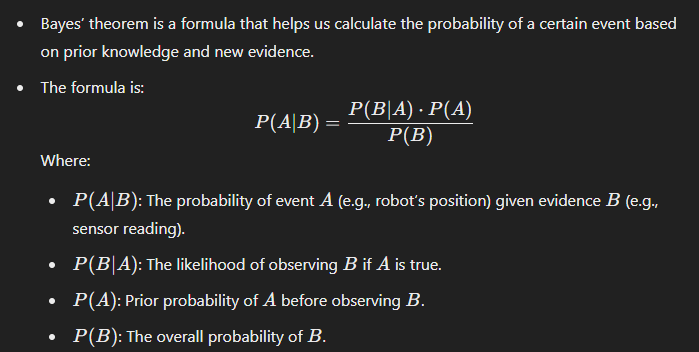
   



2. **Recursive Application**
   - In robotics or other systems, we constantly receive new data over time (e.g., sensor measurements). Each new measurement updates our belief about the system’s state.
   - **Recursive** means we use the updated probability from the last step as the "prior probability" for the next step.
   - This process repeats with every new measurement, refining the estimate.

3. **Steps in Recursive Bayes’ Theorem**
   - **Prediction Step**:
     - Use control inputs (e.g., robot movement) to predict the next state.
     - This prediction is based on a model of how the system works (e.g., if the robot moves forward, its position changes).
   - **Correction Step**:
     - Use new sensor measurements to adjust the prediction.
     - This step calculates how likely the predicted state matches the actual observation, refining the belief.

4. **Why Recursive?**
   - The belief at the current step depends on:
     - The belief from the previous step (prior knowledge).
     - The new evidence (sensor data).
   - The process keeps building on itself step-by-step, making it **recursive**.

---

### **Example in Simple Terms**

Imagine you’re trying to guess where a robot is on a straight path:
1. At first, you only have a rough idea of where it might be (prior belief).
2. The robot moves forward, and you update your guess based on this movement (prediction step).
3. The robot’s sensor detects a wall, and you compare this observation with your guess. If the guess doesn’t match the sensor data, you adjust it (correction step).
4. This new guess becomes the starting point (prior belief) for the next update when more movement or sensor data arrives.

---

### **Importance of Recursive Bayes’ Theorem**
- It helps estimate the state of a system in dynamic and uncertain environments.
- Used in robotics, self-driving cars, and other systems where decisions must be made based on incomplete or noisy data.

Let me know if you'd like a specific example or further clarification!

## 3. **Core Concept of a Particle Filter**
   - A **particle** represents one possible estimate of the system’s state (e.g., a robot’s position).
   - A **particle filter** uses many particles (guesses) to estimate a value. Over time, these particles converge toward the most probable solution using a **probability density function (PDF)**.
   - This PDF is discrete—it is made up of individual particles rather than being a smooth curve.


### **Probability Density Function (PDF)**

A **Probability Density Function (PDF)** is a way to describe how likely it is for something to happen within a certain range of values. It tells us the probabilities of different outcomes for a random variable.

---

### **Breaking It Down**

1. **What is a Random Variable?**
   - A random variable is something that can have different values depending on chance. For example:
     - The position of a robot could be a random variable, because we don’t know exactly where it is, but we have a range of possibilities.

2. **What Does a PDF Do?**
   - A PDF gives us the probability for each possible value of the random variable.
   - For continuous variables (like a robot’s position on a line), it doesn’t give exact probabilities for one value, but rather the likelihood of being within a certain range.

---

### **Example: Robot Position**
Imagine a robot moving on a straight path:
- You think the robot is somewhere between 2 meters and 6 meters from the starting point.
- The PDF for its position might look like this:
  - The robot is most likely at 4 meters (the peak of the PDF curve).
  - The likelihood decreases as you move farther from 4 meters (e.g., the robot is less likely to be at 2 or 6 meters).

---

### **How Particle Filters Use PDFs**
- In a particle filter, we approximate the PDF using **particles**. Each particle represents one guess about the robot’s position.
- Instead of a smooth curve, the PDF is made of discrete points (particles), and each particle has a weight to show how likely it is to represent the true state.

---

In short:
- A **PDF** shows how likely different values are for something uncertain, like a robot’s position.
- In particle filters, we use particles to approximate this PDF and make decisions based on it.



## 4. **Connection to Bayesian Filters**
   - A particle filter is a practical implementation of a Bayesian filter. It estimates the system’s state based on probabilities and uses particles to represent these probabilities in a discrete manner.



---
---


### **Bayesian Filters**

1. **Purpose of Bayesian Filters**
   - Bayesian filters aim to estimate the state of a system (denoted as \(x_t\)) at any given time.
   - For example, in robotics, the state might include the robot’s position and orientation.

2. **Inputs to the Estimation Process**
   - **Control measurements (\(u_t\))**: Data about the robot’s movements (e.g., how far it moved forward).
   - **Observations (\(Z_t\))**: Sensor readings about the environment (e.g., sonar detecting distance to a wall).

3. **Key Assumptions**
   - Both control measurements and observations contain uncertainties (e.g., sensors may give slightly incorrect readings).

4. **Recursive Estimation Process**
   - Bayesian filters use a two-step approach:
     1. **Prediction**: Use control measurements to predict the next state.
     2. **Correction**: Use sensor observations to refine the prediction and get a more accurate state estimate.
   - This is done at each time step, and the estimate evolves as new data comes in.

5. **Mathematical Representation**
   - The system’s state \(x_t\) is estimated as a probability distribution, often referred to as \(Bel(x_t)\). This belief is updated using Bayes’ theorem.

---



### **How Particle Filters Work**

1. **Key Components**
   - A **set of particles**: Each particle is a guess about the system’s state (e.g., robot position).
   - Each particle has a **weight**, representing how likely that particle is to represent the true state.

2. **Algorithm Steps**
   - **Initialization**: Start with a random distribution of particles across the possible states.
   - **Prediction**:
     - Use control measurements (\(u_t-1\)) to move the particles based on the system’s dynamics.
     - Add some randomness to account for uncertainties in the movement.
   - **Correction**:
     - Compare the predicted state of each particle with the actual sensor observation (\(z_t\)).
     - Update the weights of the particles based on how well they match the observation.
   - **Resampling**:
     - Keep the particles with higher weights (more likely to be correct) and discard those with low weights.
     - Generate new particles around the high-weight particles to maintain the same total number of particles.

3. **Final State Estimate**
   - The system’s state is estimated based on the weighted average of all particles or by selecting the particle with the highest weight.

4. **Advantages of Particle Filters**
   - Handles nonlinear systems and noise effectively.
   - Does not assume the system follows a specific mathematical model (e.g., Gaussian distributions).

---


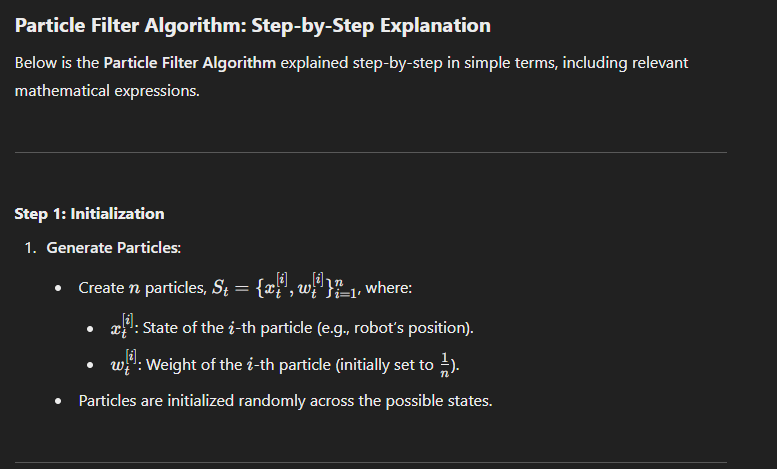
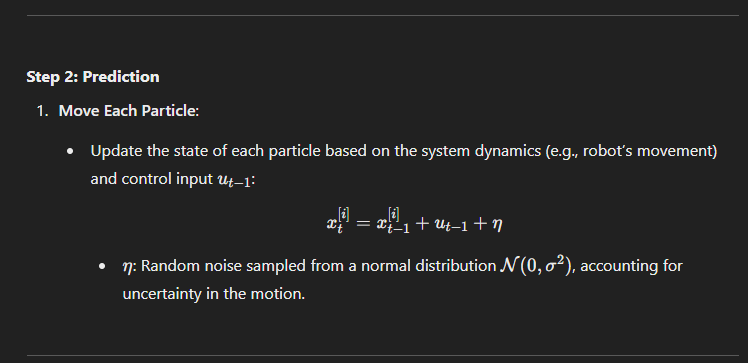
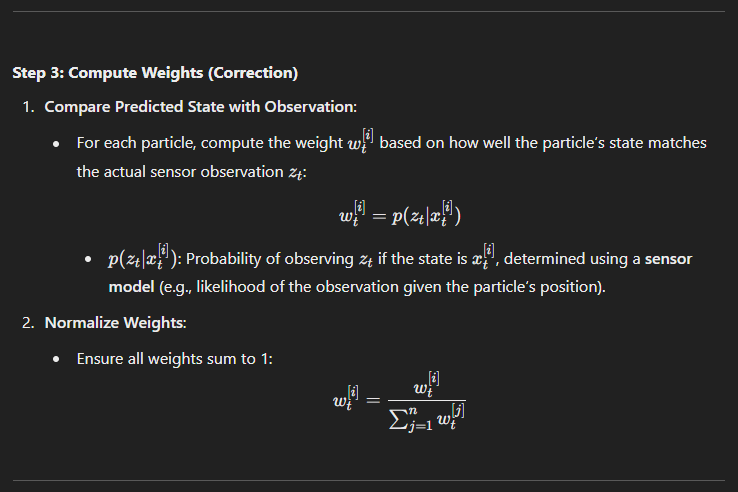

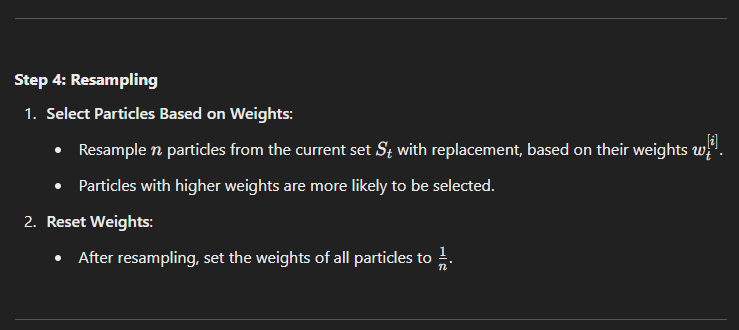

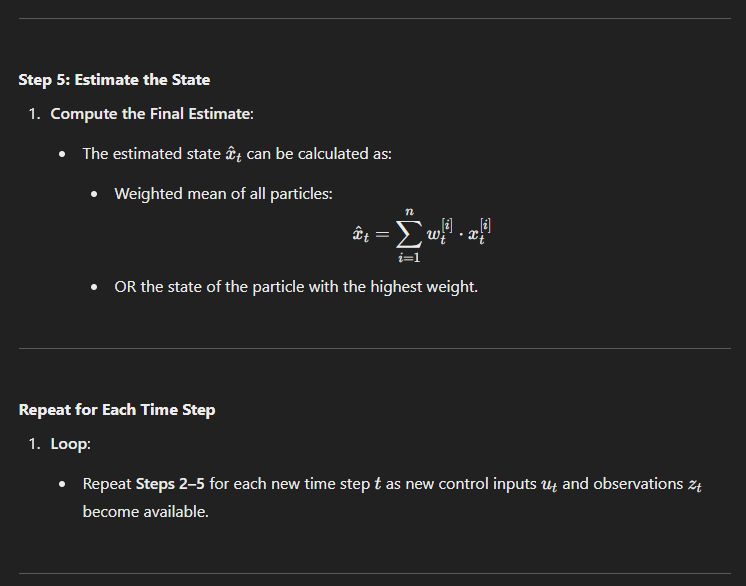


### **Application: Robot Localization in 1 Dimension**

1. **The Problem**
   - A robot moves in a 1D space (e.g., along a straight wall with gaps).
   - The robot needs to determine its position based on noisy sensor data and movement commands.

2. **Using Particle Filters**
   - **Particles as Guesses**: Each particle represents a possible position of the robot.
   - **Updating Positions**:
     - When the robot moves, the particles shift accordingly, with some randomness added to account for uncertainties.
   - **Using Observations**:
     - The robot uses its sensors (e.g., distance to the wall) to compare predicted positions with actual measurements.
     - Particles that align well with the sensor data get higher weights.
   - **Refining the Estimate**:
     - The algorithm resamples particles, keeping those with higher weights and discarding others.
     - Over time, the particles converge to the robot’s true position.

3. **Visual Example**
   - At each time step, particles are updated based on movement and sensor data.
   - As the algorithm progresses, the particles cluster around the robot’s actual position.

---


# Implementation Demo - Python

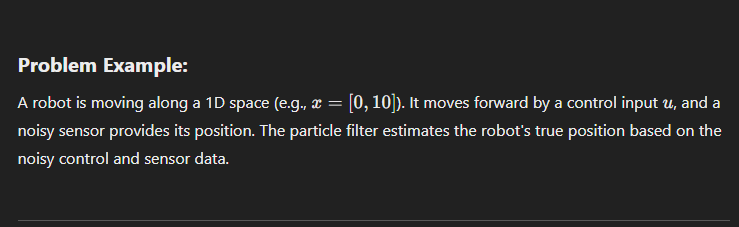

### Single Step

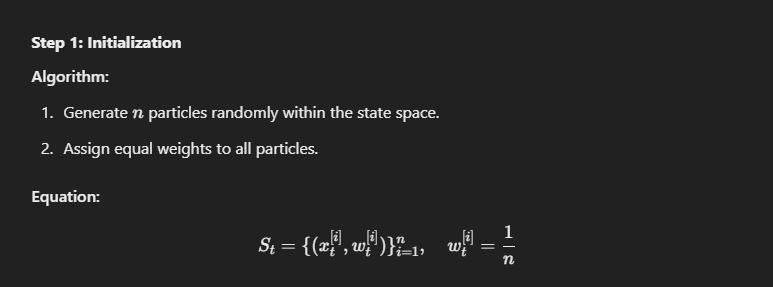

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Number of particles
n_particles = 100

# Initialize particles randomly within the range [0, 10]
particles = np.random.uniform(0, 10, n_particles)

# Assign equal weights to all particles
weights = np.ones(n_particles) / n_particles


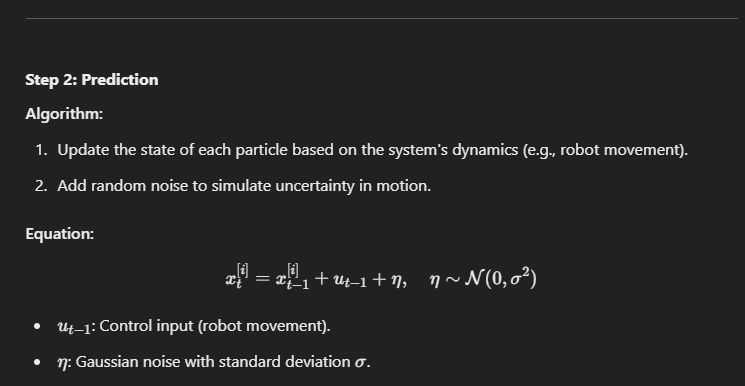

In [16]:
# Function to move particles based on control input and motion noise
def move_particles(particles, control, std_dev):
    motion_noise = np.random.normal(0, std_dev, n_particles)
    particles += control + motion_noise
    return np.clip(particles, 0, 10)  # Keep particles within the range [0, 10]

# Example of applying motion
control_input = 1.0  # Move forward by 1 unit
motion_std_dev = 0.2  # Standard deviation of motion noise
particles = move_particles(particles, control_input, motion_std_dev)


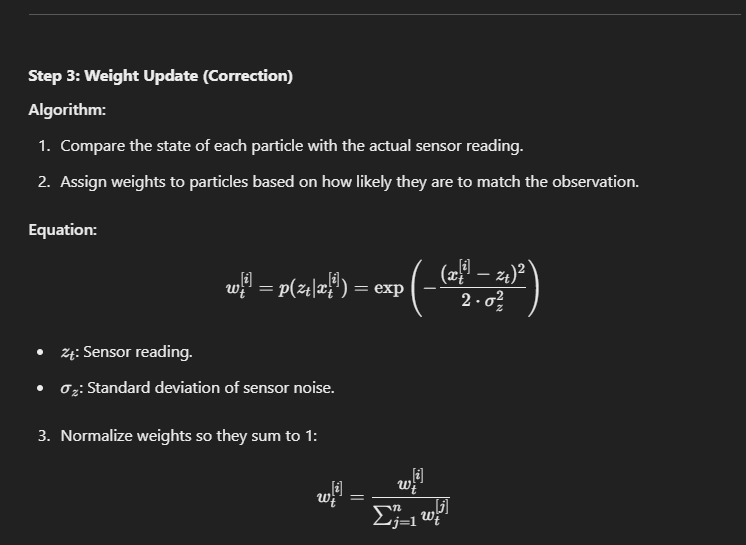

In [17]:
# Function to update particle weights based on sensor reading
def update_weights(particles, sensor_reading, std_dev):
    likelihoods = np.exp(-((particles - sensor_reading) ** 2) / (2 * std_dev ** 2))
    weights = likelihoods / np.sum(likelihoods)  # Normalize weights
    return weights

# Simulate a noisy sensor reading
true_position = 5.0  # True position of the robot
sensor_std_dev = 0.5  # Sensor noise
sensor_reading = np.random.normal(true_position, sensor_std_dev)

# Update weights
weights = update_weights(particles, sensor_reading, sensor_std_dev)


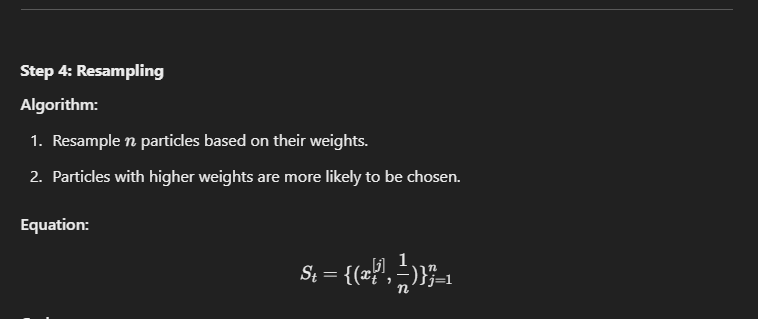

In [18]:
# Function to resample particles based on weights
def resample_particles(particles, weights):
    indices = np.random.choice(np.arange(n_particles), size=n_particles, p=weights)
    resampled_particles = particles[indices]
    return resampled_particles

# Resample particles
particles = resample_particles(particles, weights)


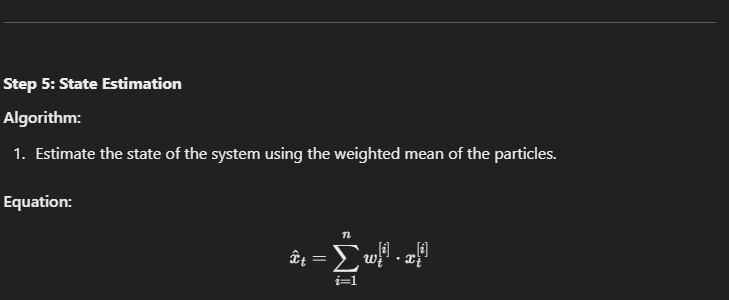

In [19]:
# Function to estimate the state
def estimate_state(particles, weights):
    return np.sum(particles * weights)

# Estimate the robot's position
estimated_position = estimate_state(particles, weights)
print(f"True Position: {true_position:.2f}, Sensor Reading: {sensor_reading:.2f}, Estimated Position: {estimated_position:.2f}")


True Position: 5.00, Sensor Reading: 5.61, Estimated Position: 5.75


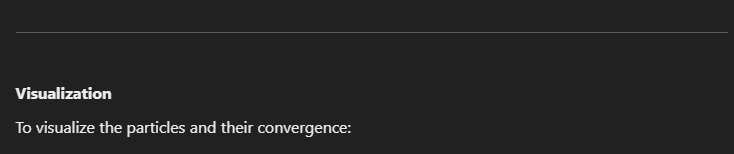

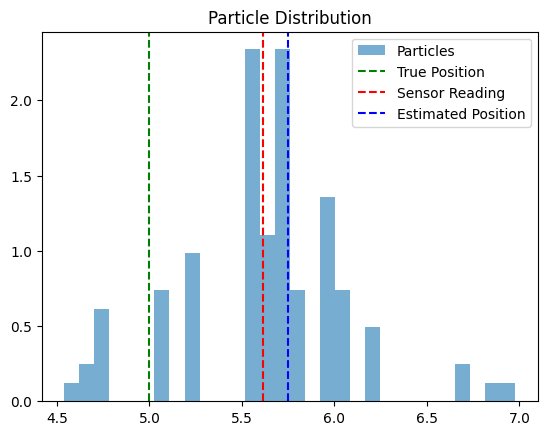

In [20]:
# Visualize the distribution of particles
plt.figure()
plt.hist(particles, bins=30, density=True, alpha=0.6, label="Particles")
plt.axvline(true_position, color='g', linestyle='--', label="True Position")
plt.axvline(sensor_reading, color='r', linestyle='--', label="Sensor Reading")
plt.axvline(estimated_position, color='b', linestyle='--', label="Estimated Position")
plt.title("Particle Distribution")
plt.legend()
plt.show()


## Multiple Number of steps (Simulation)

Step 1:
True Position: 6.00, Sensor Reading: 6.14, Estimated Position: 6.38


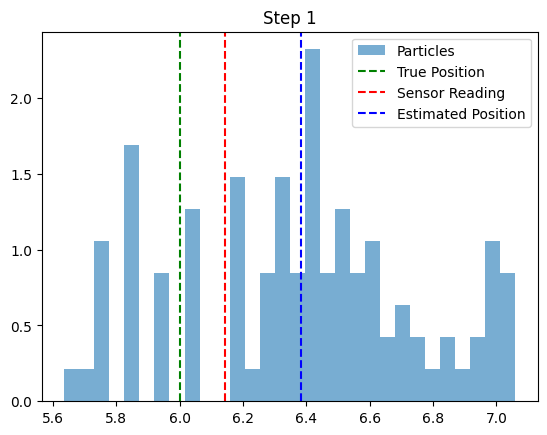

Step 2:
True Position: 7.00, Sensor Reading: 6.88, Estimated Position: 7.20


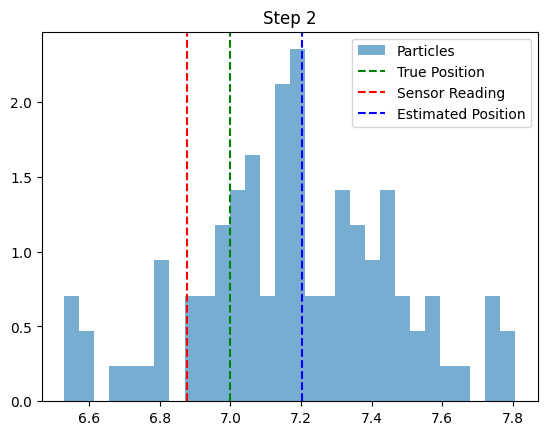

Step 3:
True Position: 8.00, Sensor Reading: 8.88, Estimated Position: 8.42


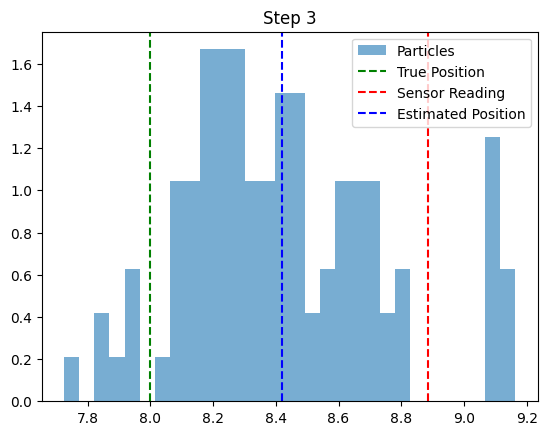

Step 4:
True Position: 9.00, Sensor Reading: 10.52, Estimated Position: 9.72


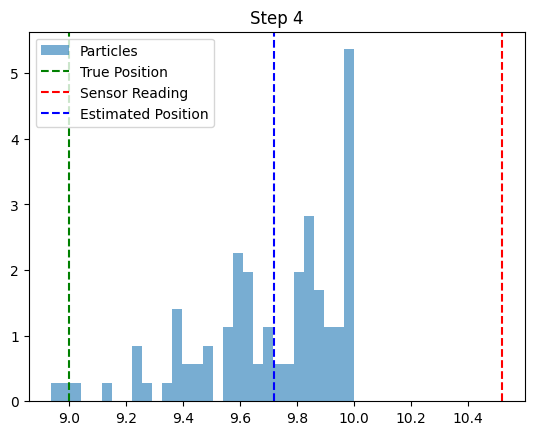

Step 5:
True Position: 10.00, Sensor Reading: 10.46, Estimated Position: 10.00


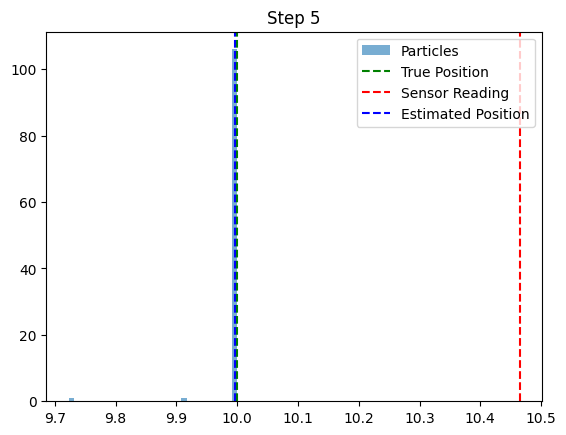

Step 6:
True Position: 11.00, Sensor Reading: 10.71, Estimated Position: 10.00


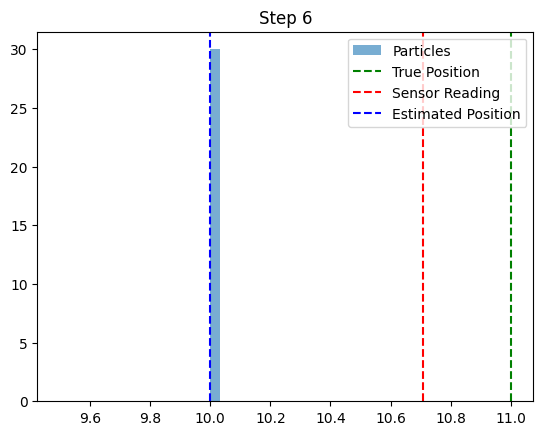

Step 7:
True Position: 12.00, Sensor Reading: 12.63, Estimated Position: 10.00


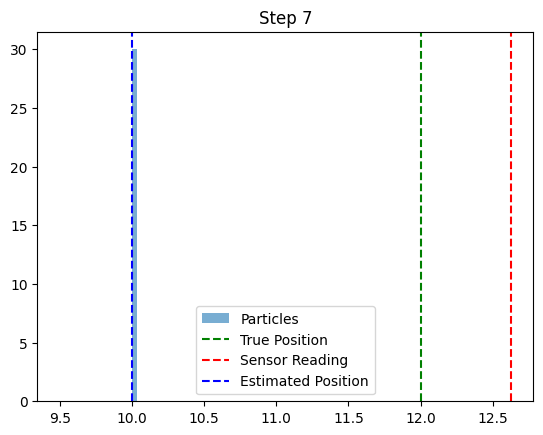

Step 8:
True Position: 13.00, Sensor Reading: 13.90, Estimated Position: 10.00


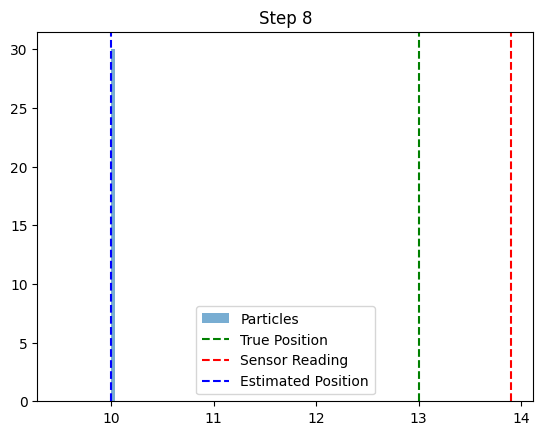

Step 9:
True Position: 14.00, Sensor Reading: 14.16, Estimated Position: 10.00


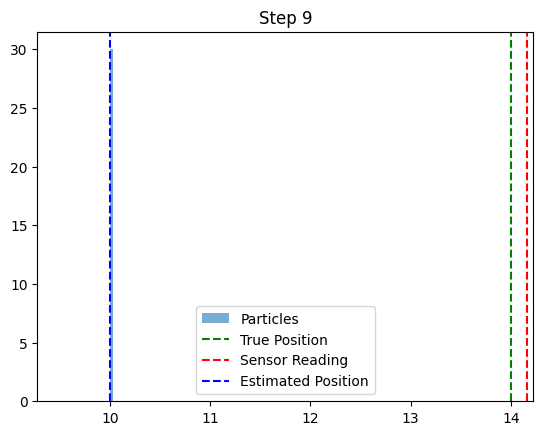

Step 10:
True Position: 15.00, Sensor Reading: 14.85, Estimated Position: 10.00


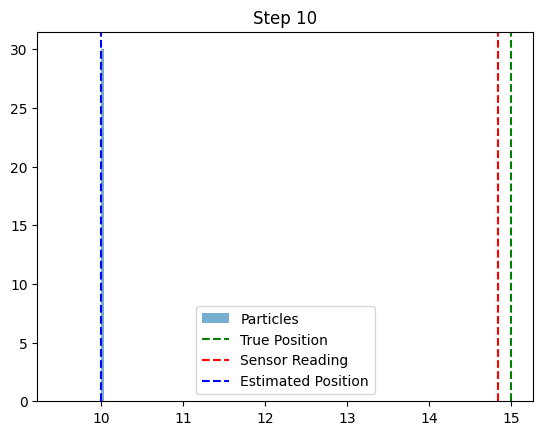

In [21]:
# Simulation setup
true_position = 5.0  # True initial position of the robot
control_input = 1.0  # Robot moves forward by 1 unit per step
sensor_std_dev = 0.5  # Sensor noise
motion_std_dev = 0.2  # Motion noise

# Run particle filter over multiple steps
num_steps = 10
for step in range(num_steps):
    # Simulate robot motion and noisy sensor reading
    true_position += control_input
    sensor_reading = np.random.normal(true_position, sensor_std_dev)  # Noisy sensor data

    # Particle Filter Steps
    particles = move_particles(particles, control_input, motion_std_dev)  # Prediction step
    weights = update_weights(particles, sensor_reading, sensor_std_dev)  # Correction step
    particles = resample_particles(particles, weights)                   # Resampling step
    estimated_position = estimate_state(particles, weights)              # Estimate the state

    # Print and visualize
    print(f"Step {step+1}:")
    print(f"True Position: {true_position:.2f}, Sensor Reading: {sensor_reading:.2f}, Estimated Position: {estimated_position:.2f}")

    # Visualization of particles
    plt.figure()
    plt.hist(particles, bins=30, density=True, alpha=0.6, label="Particles")
    plt.axvline(true_position, color='g', linestyle='--', label="True Position")
    plt.axvline(sensor_reading, color='r', linestyle='--', label="Sensor Reading")
    plt.axvline(estimated_position, color='b', linestyle='--', label="Estimated Position")
    plt.title(f"Step {step+1}")
    plt.legend()
    plt.show()


---
---

# Why these Four steps are important?

The **four steps** of the particle filter algorithm—**initialization, prediction, correction (weight update), and resampling**—are crucial because they systematically address uncertainty, improve the accuracy of estimates, and focus computation on the most likely solutions. Here's why each step is essential for success:

---

### **1. Initialization**
- **Purpose**: To create an initial set of guesses (particles) for the system's state.
- **Why it's Important**:
  - Without initialization, the algorithm has no starting point to work from.
  - Randomly distributing particles ensures that the algorithm can consider all possible states, even if we don't know the true state initially.
  - Equal weights ensure no bias toward a specific state at the start.

---

### **2. Prediction**
- **Purpose**: To move particles based on the system's dynamics and control input.
- **Why it's Important**:
  - The system (e.g., a robot) evolves over time due to its movements or actions. The particles must reflect this evolution.
  - Prediction accounts for motion uncertainty by adding randomness, which mimics real-world scenarios (e.g., a robot's wheels slipping slightly).
  - It ensures particles are updated to align with the system’s likely behavior, keeping the filter relevant to the actual dynamics.

---

### **3. Correction (Weight Update)**
- **Purpose**: To evaluate how well each particle matches the current sensor observation and update weights accordingly.
- **Why it's Important**:
  - Sensors provide the only direct information about the system’s current state. Correction ensures the algorithm learns from this data.
  - The likelihood function assigns higher weights to particles closer to the sensor reading, focusing the filter on the most probable regions.
  - Without this step, the algorithm would not adjust its guesses to fit real-world observations, leading to poor estimates.

---

### **4. Resampling**
- **Purpose**: To eliminate unlikely particles and focus on the particles that are more probable.
- **Why it's Important**:
  - Over time, particles with low weights (unlikely guesses) clutter the computation and reduce efficiency.
  - Resampling ensures the algorithm concentrates on the most probable areas of the state space, improving accuracy.
  - Without resampling, the algorithm would waste resources on unlikely states, slowing convergence and reducing the quality of the estimate.

---

### **Why All Four Steps Are Necessary**
These steps form a cycle that continuously refines the particle filter's estimate:

1. **Initialization** ensures a broad search across the possible states.
2. **Prediction** aligns the particles with the expected evolution of the system.
3. **Correction** anchors the particles to real-world observations, improving the accuracy of the guesses.
4. **Resampling** eliminates low-probability particles and sharpens the focus on the most likely solutions.

If any step is missing:
- **No initialization**: The filter cannot start, as there are no particles.
- **No prediction**: The particles would not reflect the system’s dynamics, leading to incorrect estimates.
- **No correction**: The filter would not learn from observations, losing its ability to adapt to the real-world state.
- **No resampling**: The filter would waste resources on unlikely particles, slowing or preventing convergence.

---
